<a href="https://colab.research.google.com/github/Sid-2862/ML9/blob/main/Kmeans_clustering_%26_Hierarchal_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means CLustering - Unsupervised Machine Learning algorithm
Clusters are formed on basis of Elucidean distance calculated between each datapoint and centroid

## Evaluation metrics are :
Cluster formation:

## Inertia:
intra cluster distance: within the cluster, the distance between datapoints should be minimal

inter cluster distance: in between the multiple clusters, the distance should be maximum

## Silhoutee score:
the datapoint maintains minimum distance within other datapoints in the cluster and also this datapint maintains maximum distance with other datapoint of other cluster

In [26]:
%pip install yellowbrick

In [27]:
%pip install plotly nbformat

In [28]:
import pandas as pd
path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(path)
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [31]:
df.duplicated().sum()

np.int64(0)


## Define X features: These are the features on basis of which clustering should be performed

In [32]:
x = df.drop(columns=["CustomerID","Genre"])
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [33]:
x.columns = ["Age","Income","Spending"]

In [34]:
x.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data Preprocessing and Data cleaning

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [36]:
con_pipe = make_pipeline(SimpleImputer(strategy="mean"),
                         StandardScaler()).set_output(transform="pandas")

In [37]:
con_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [38]:
x_pre = con_pipe.fit_transform(x)
x_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Build the model : k_means

In [39]:
from sklearn.cluster import KMeans

In [40]:
from yellowbrick.cluster import kelbow_visualizer

In [41]:
model = KMeans(n_clusters=5)
model.fit_predict(x_pre)

array([2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2,
       3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

## Kelbow_visualizer

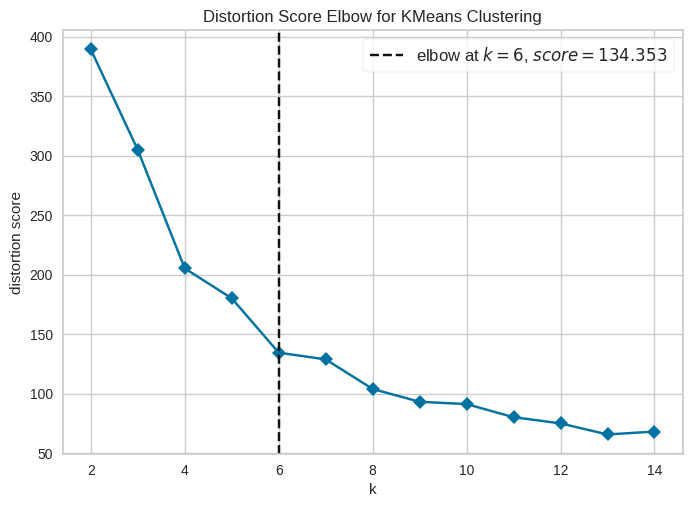

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
base_model = KMeans()
visualizer = kelbow_visualizer(base_model,x_pre,k=(2,15),timings=False)
visualizer.show()

In [43]:
best_kmeans = KMeans(n_clusters=6)
clusters = best_kmeans.fit_predict(x_pre)
clusters

array([3, 5, 3, 5, 3, 5, 3, 5, 1, 5, 1, 5, 1, 5, 3, 5, 3, 5, 1, 5, 3, 5,
       1, 5, 1, 5, 1, 5, 3, 5, 1, 5, 1, 5, 1, 5, 1, 5, 3, 5, 1, 5, 1, 3,
       1, 5, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

In [44]:
##  Centroids of each cluster
best_kmeans.cluster_centers_

array([[ 0.22171558,  1.08322527, -1.29005223],
       [ 1.19862745, -0.46098141, -0.32703818],
       [-0.41736042,  0.65514535,  1.19838142],
       [-0.81378845, -0.39900859, -0.25556151],
       [-0.4589806 ,  1.81769762,  1.26275949],
       [-0.97439592, -1.32954532,  1.13217788]])

In [45]:
x.head(

)

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [46]:
x["Clusters"] =  clusters
x.head()

,Age,Income,Spending,Clusters
0,19,15,39,3
1,21,15,81,5
2,20,16,6,3
3,23,16,77,5
4,31,17,40,3


In [47]:
for i in range(6):
  print(f"Details of clusters{i}")
  display(x[x["Clusters"]==i])
  print("---------------------------------")

Details of clusters0


,Age,Income,Spending,Clusters
126,43,71,35,0
128,59,71,11,0
130,47,71,9,0
134,20,73,5,0
136,44,73,7,0
140,57,75,5,0
144,25,77,12,0
146,48,77,36,0
148,34,78,22,0
150,43,78,17,0


---------------------------------
Details of clusters1


,Age,Income,Spending,Clusters
8,64,19,3,1
10,67,19,14,1
12,58,20,15,1
18,52,23,29,1
22,46,25,5,1
24,54,28,14,1
26,45,28,32,1
30,60,30,4,1
32,53,33,4,1
34,49,33,14,1


---------------------------------
Details of clusters2


,Age,Income,Spending,Clusters
122,40,69,58,2
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2


---------------------------------
Details of clusters3


,Age,Income,Spending,Clusters
0,19,15,39,3
2,20,16,6,3
4,31,17,40,3
6,35,18,6,3
14,37,20,13,3
16,35,21,35,3
20,35,24,35,3
28,40,29,31,3
38,36,37,26,3
43,31,39,61,3


---------------------------------
Details of clusters4


,Age,Income,Spending,Clusters
179,35,93,90,4
181,32,97,86,4
183,29,98,88,4
185,30,99,97,4
187,28,101,68,4
189,36,103,85,4
191,32,103,69,4
193,38,113,91,4
195,35,120,79,4
197,32,126,74,4


---------------------------------
Details of clusters5


,Age,Income,Spending,Clusters
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5
19,35,23,98,5


---------------------------------


## Metrics :
inertia

In [48]:
best_kmeans.inertia_

157.8756120606529

## plot the clusters for this model

In [49]:
import plotly.express as px

In [50]:
fig = px.scatter_3d(data_frame=x,x="Age",y="Income",z="Spending",color="Clusters",symbol="Clusters")
fig.show()

## Hierarchal Clustering => Agglomerative Clustering

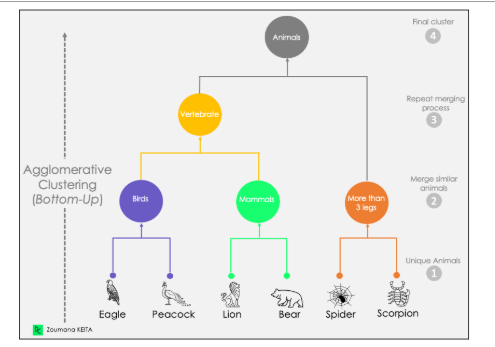

In [51]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
x.head()

,Age,Income,Spending,Clusters
0,19,15,39,3
1,21,15,81,5
2,20,16,6,3
3,23,16,77,5
4,31,17,40,3


In [53]:
xnew = x.drop(columns=["Clusters"])
xnew

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [55]:
agc = AgglomerativeClustering(n_clusters=7)
agc.fit(xnew)

AgglomerativeClustering(n_clusters=7)

In [56]:
l1 = agc.labels_
l1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 5, 0, 5, 0, 5, 0,
       2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0])

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
silhouette_score(xnew,l1)

np.float64(0.4262301125101286)

In [60]:
agc1 = AgglomerativeClustering(n_clusters=4)
agc1.fit(xnew)

AgglomerativeClustering(n_clusters=4)

In [61]:
l2 = agc1.labels_
l2

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [62]:
silhouette_score(xnew,l2)

np.float64(0.41037986351850747)

In [63]:

# create a range of data for k clusters
import numpy as np
ks = np.arange(start=2,stop=16,step=1)
ks

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [67]:
sil_scores = []
for i in ks:
  # create a agglomerative model
  agc = AgglomerativeClustering(n_clusters=i)
  agc.fit(xnew)
  # generate labels and store them
  lab = agc.labels_

  # generate silhoutte score
  ss = silhouette_score(xnew,lab)

  # add the silhoutte scores to sil_scores
  sil_scores.append(ss)
print(sil_scores)

[np.float64(0.2992593203550994), np.float64(0.38141795042544546), np.float64(0.41037986351850747), np.float64(0.4401889024290193), np.float64(0.44308912983504156), np.float64(0.4262301125101286), np.float64(0.41028404899198817), np.float64(0.3663955117052502), np.float64(0.351820333160781), np.float64(0.3463610714830034), np.float64(0.3410778009986224), np.float64(0.3283549555627869), np.float64(0.3322538056675734), np.float64(0.32842591092474593)]


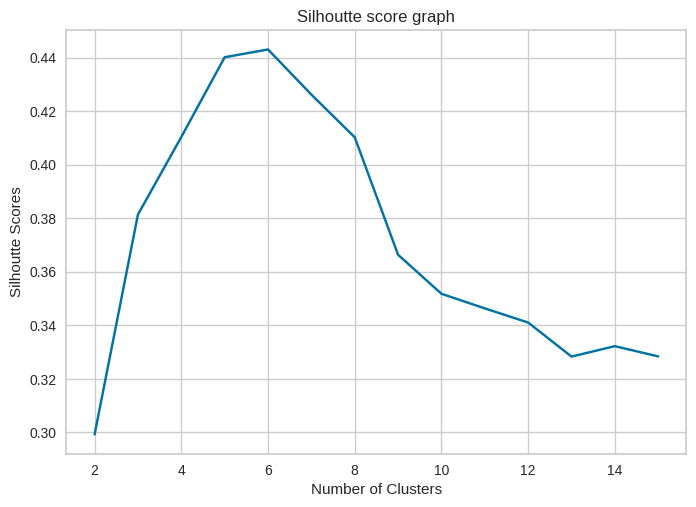

In [68]:

import matplotlib.pyplot as plt
plt.title("Silhoutte score graph")
plt.plot(ks,sil_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Scores")
plt.show()

## For 6 clusters, we are getting the maximum silhoutte score.

In [69]:
final_agc = AgglomerativeClustering(n_clusters=6)
final_agc.fit(xnew)

AgglomerativeClustering(n_clusters=6)

In [70]:

final_agc.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [71]:
xnew["Clusters"] = final_agc.labels_
xnew.head()

,Age,Income,Spending,Clusters
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


### Dendrogram

<ipython-input-73-de338a631deb>:5: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



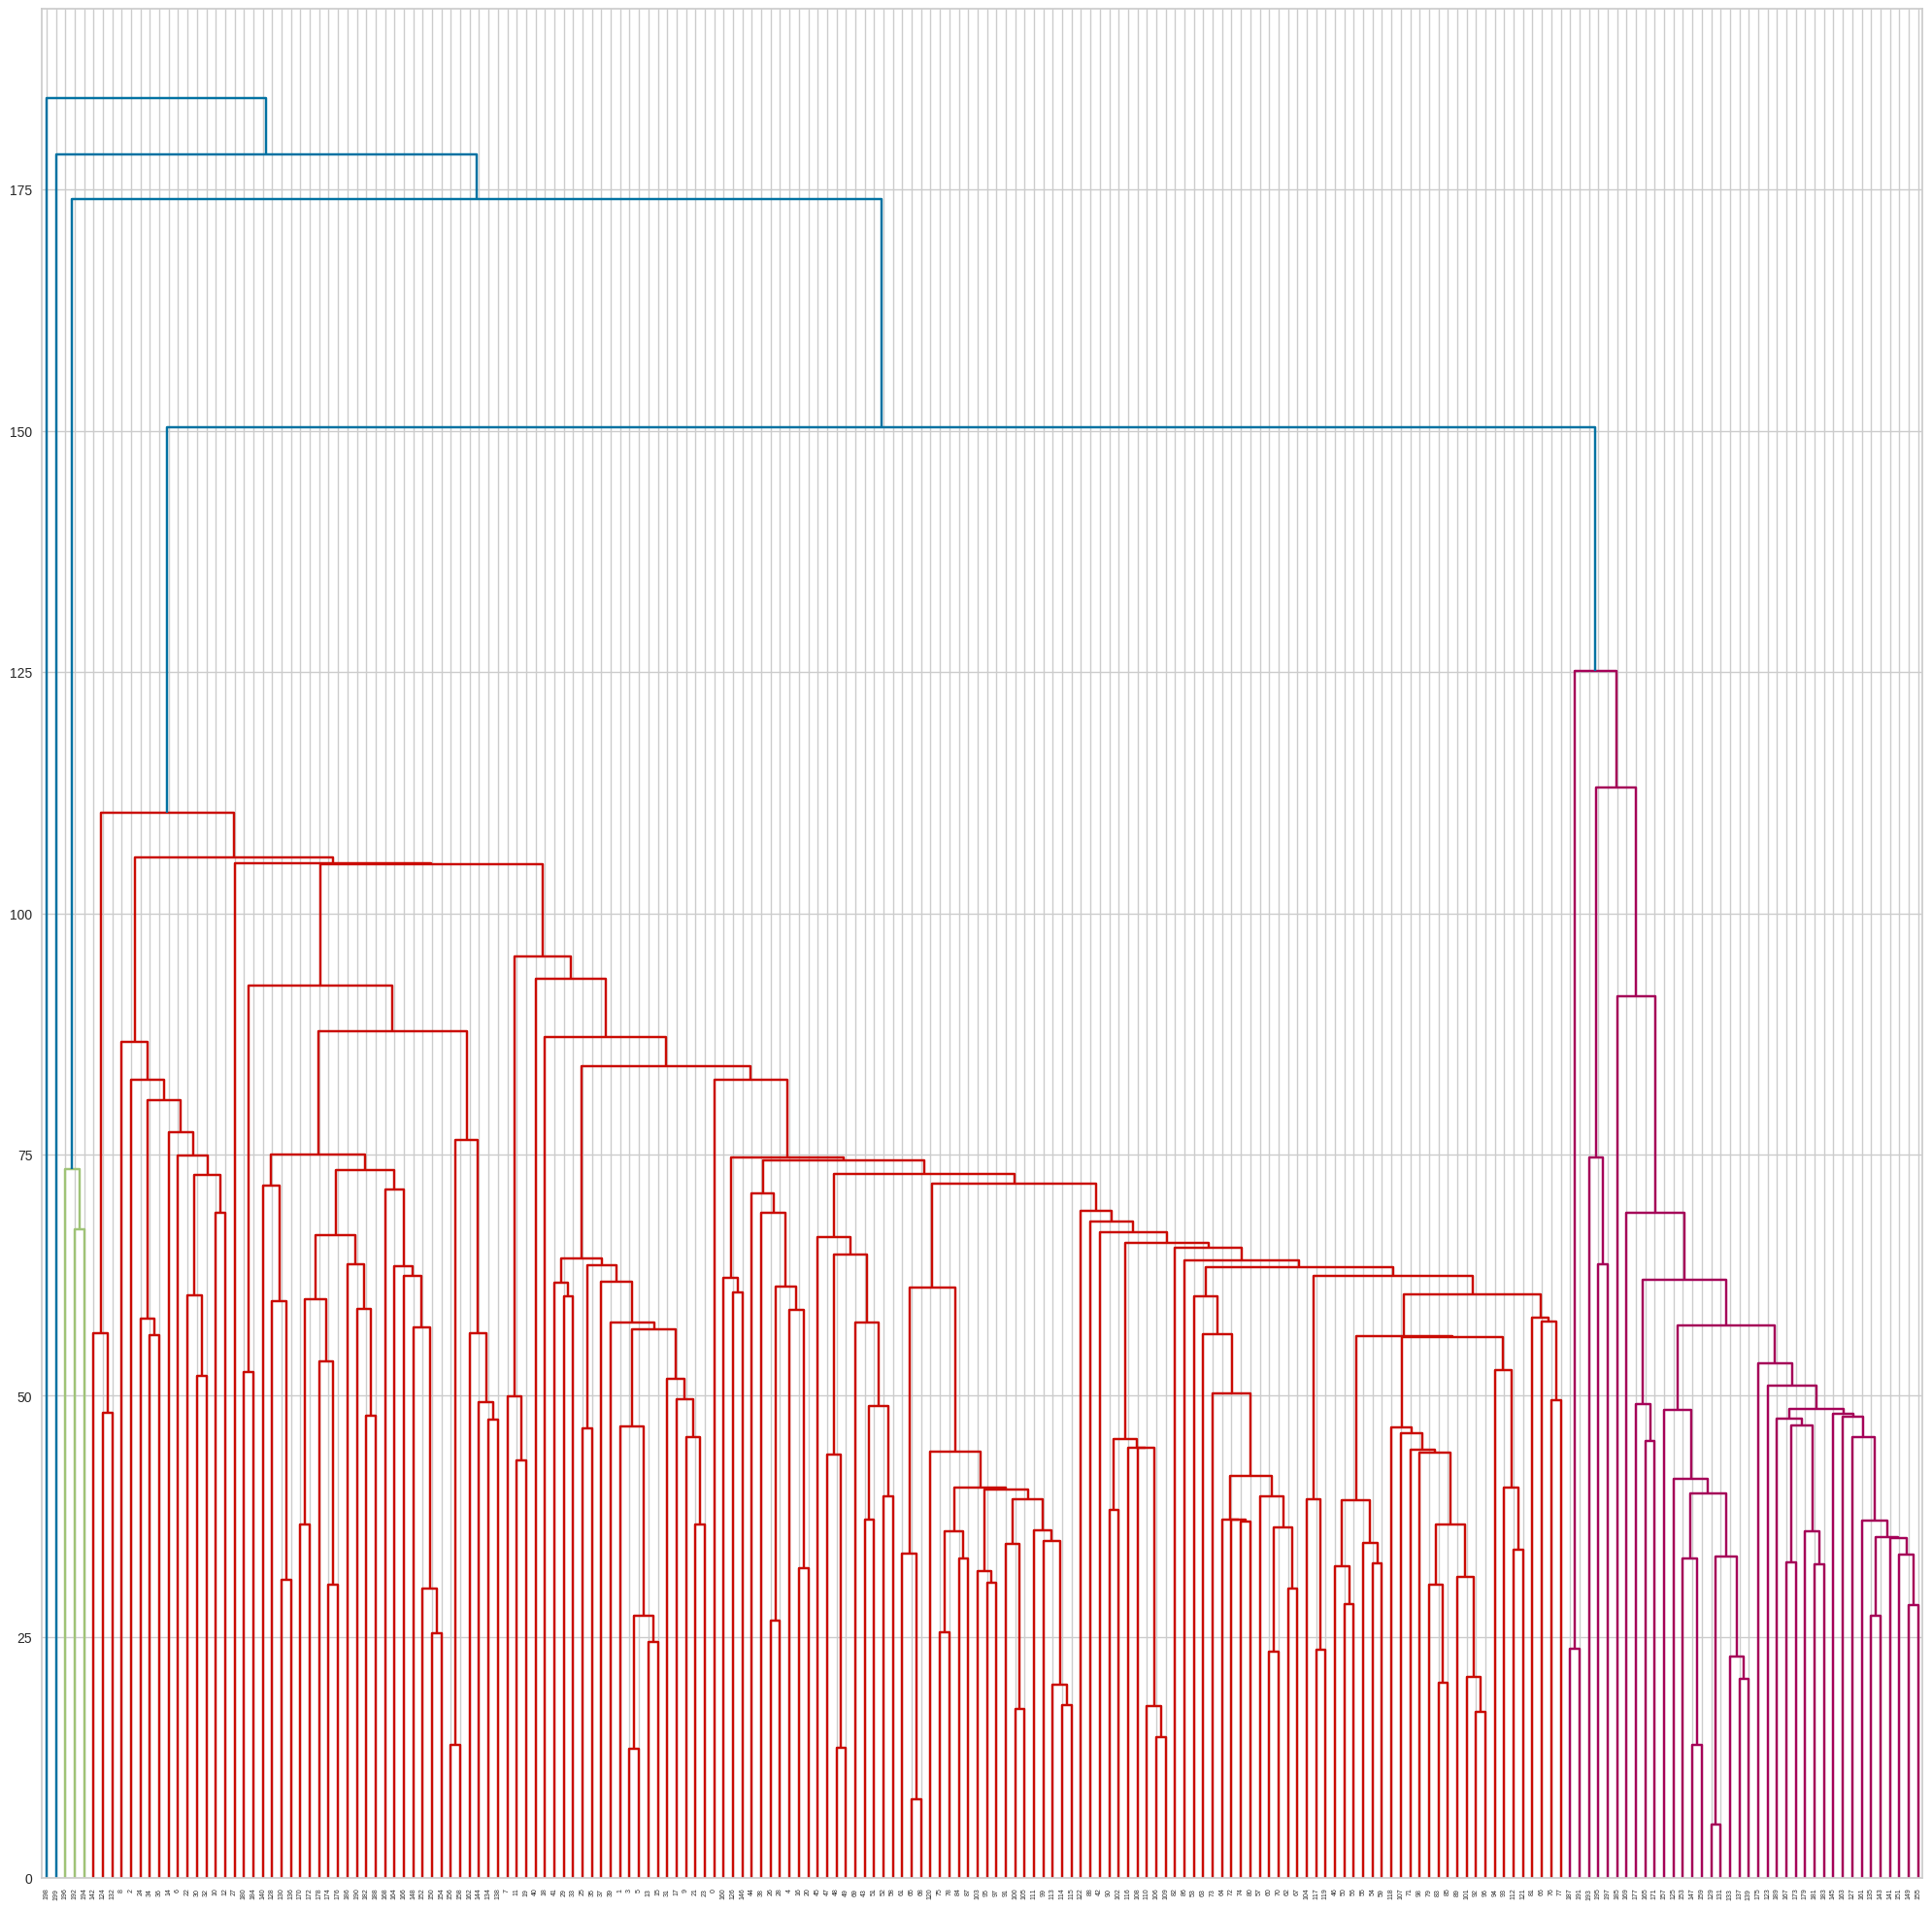

In [73]:

plt.figure(figsize=(25,25))
from scipy.spatial import distance_matrix
DM = distance_matrix(xnew,xnew)
from scipy.cluster.hierarchy import linkage
linkages = linkage(DM)
from scipy.cluster.hierarchy import dendrogram
Q = dendrogram(linkages)